In [1]:
from random import sample as rsample

import numpy as np

from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Dense, Flatten
from keras.layers import Input
from keras.optimizers import SGD, RMSprop
from keras import backend as K
import gym
import matplotlib.pyplot as plt
from skimage import color
from scipy.misc import imresize


%matplotlib inline

K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
env = gym.make('Breakout-v0')
print env.observation_space

img = env.reset()
print img.shape

def grayAndResize(img):
    gray = color.rgb2grey(img)
    newImg = imresize(gray, (84, 84))
    return newImg

def stackIt(images):
    stage = np.zeros(shape = (1, 84, 84, 4))
    for k, img in enumerate(images):
        #print "Image shape", type(img)
        stage[0, :, :, k] = grayAndResize(img)
    return stage

[2017-04-11 19:05:00,672] Making new env: Breakout-v0


Box(210, 160, 3)
(210, 160, 3)


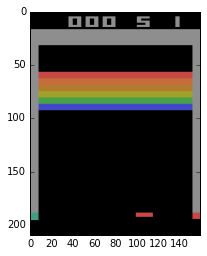

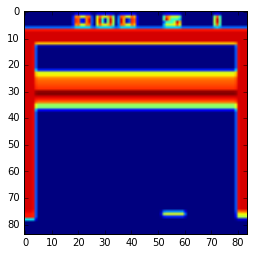

6
(84, 84) (1, 84, 84, 4)


In [3]:
plt.imshow(img)
plt.show()

images = stackIt([img, img, img, img])

images = images

plt.imshow(images[0, :, :, 1])
plt.show()
print env.action_space.n
print images[0, :, :, 1].shape, images.shape

In [4]:
def experience_replay(batch_size):
    """
    Coroutine of experience replay.
    
    Provide a new experience by calling send, which in turn yields 
    a random batch of previous replay experiences.
    """
    memory = []
    while True:
        experience = yield rsample(memory, batch_size) if batch_size <= len(memory) else None
        memory.append(experience)


In [7]:
def build_model(STATE_LENGTH, FRAME_WIDTH, FRAME_HEIGHT, output_size ,dir = None):
    model = Sequential()
    model.add(Convolution2D(32, (8, 8), subsample=(4, 4), border_mode='same', activation='relu', input_shape = (84, 84, 4)))
    model.add(Convolution2D(32, 4, 4, subsample=(2, 2), border_mode='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(6))
    
    return model

In [9]:
nb_epochs = 1000
batch_size = 128
epsilon = .8
gamma = .8
K_frames = 4 #frames to skip each step

model  = build_model(STATE_LENGTH = K_frames, FRAME_WIDTH = 84, FRAME_HEIGHT = 84,output_size=env.action_space.n)
model.compile(RMSprop(), 'MSE')

model.load_weights('breakout.h5')
env = gym.make('Breakout-v0')
print env.observation_space

img = env.reset()
action = 0
done = 0

while done != True:
    env.step(action)
    env.render()
    for i in range(K_frames-1):
        s, r, done, info = env.step(action)
        env.render()
        ls.append(s)
        rewards+=r
        if(done):
            done = True
            break
        #print s.shape
    S = stackIt(ls)
    action = np.argmax(model.predict(S))
    


[2017-04-11 19:13:19,220] Making new env: Breakout-v0


Box(210, 160, 3)


ContextException: Could not create GL context